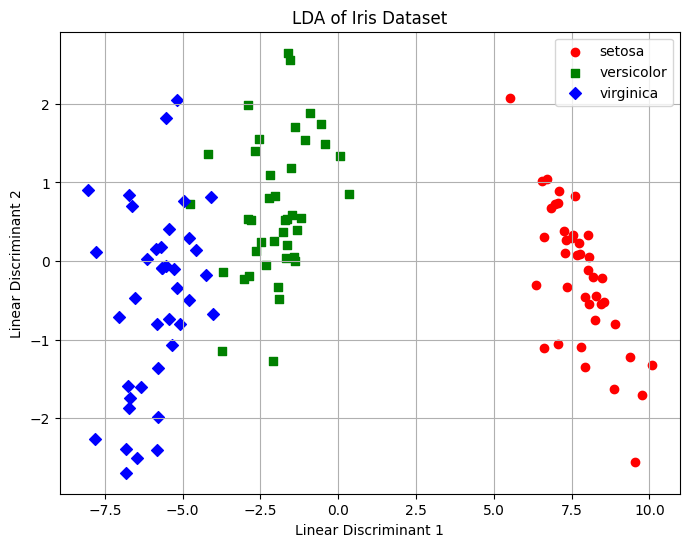

LDA has been successfully applied to the Iris dataset.


In [1]:
#code 1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize LDA
lda = LDA(n_components=2)  # We can only have n_classes - 1 components

# Fit LDA on training data
X_lda = lda.fit_transform(X_train, y_train)

# Transform test data using LDA
X_test_lda = lda.transform(X_test)

# Create a DataFrame for easy plotting
lda_df = pd.DataFrame(data=X_lda, columns=['LD1', 'LD2'])
lda_df['target'] = y_train

# Plotting the LDA results
plt.figure(figsize=(8, 6))
colors = ['red', 'green', 'blue']
markers = ['o', 's', 'D']

for target, color, marker in zip(np.unique(y_train), colors, markers):
    plt.scatter(lda_df.loc[lda_df['target'] == target, 'LD1'],
                lda_df.loc[lda_df['target'] == target, 'LD2'],
                color=color, label=iris.target_names[target], marker=marker)

plt.title('LDA of Iris Dataset')
plt.xlabel('Linear Discriminant 1')
plt.ylabel('Linear Discriminant 2')
plt.legend(loc='best')
plt.grid()
plt.show()

# Conclusion
print("LDA has been successfully applied to the Iris dataset.")


LDA Model Accuracy: 0.78
              precision    recall  f1-score   support

           0       0.83      0.63      0.72        38
           1       0.64      0.85      0.73        27
           2       0.92      0.92      0.92        25

    accuracy                           0.78        90
   macro avg       0.80      0.80      0.79        90
weighted avg       0.80      0.78      0.78        90



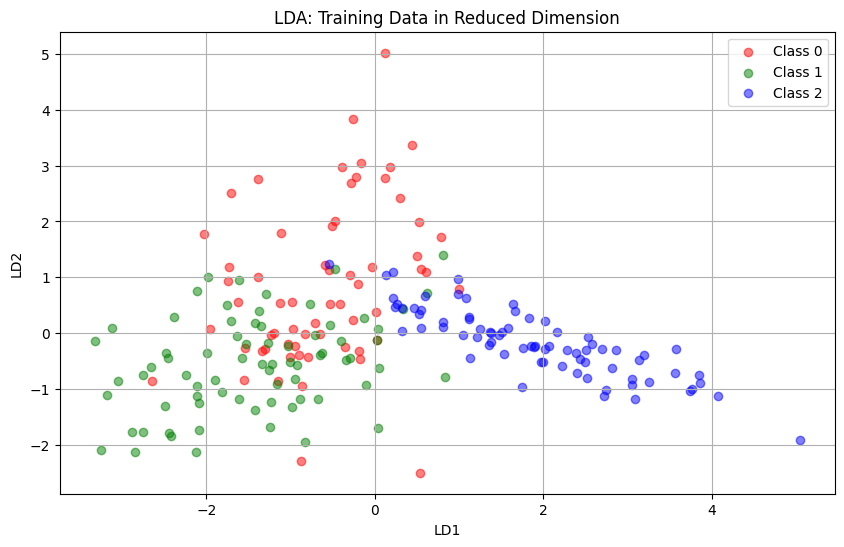

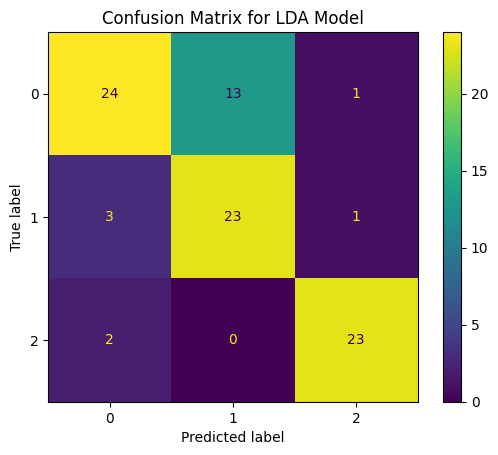

Thus the program for Linear Discriminant Analysis (LDA) has been executed successfully.


In [3]:
#code 2
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Generate synthetic data for multi-class classification
X, y = make_classification(n_samples=300, n_features=5, n_informative=3,
                           n_redundant=0, n_clusters_per_class=1, n_classes=3, random_state=42)

# Split the dataset into training and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and fit the LDA model
lda = LDA(n_components=2)  # Reduce to 2 dimensions for visualization
lda.fit(X_train, y_train)

# Transform both training and test sets using the fitted LDA model
X_train_lda = lda.transform(X_train)
X_test_lda = lda.transform(X_test)

# Make predictions on the test set
y_pred = lda.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"LDA Model Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

# Visualize the results in the reduced space
plt.figure(figsize=(10, 6))
colors = ['red', 'green', 'blue']
for i in range(3):  # Assuming 3 classes
    plt.scatter(X_train_lda[y_train == i][:, 0], X_train_lda[y_train == i][:, 1], 
                color=colors[i], label=f'Class {i}', alpha=0.5)
plt.title('LDA: Training Data in Reduced Dimension')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.grid()
plt.show()

# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
plt.title('Confusion Matrix for LDA Model')
plt.show()

# Conclusion
print("Thus the program for Linear Discriminant Analysis (LDA) has been executed successfully.")